# Exploratory analysis of the Eurovision 2018 votes Dataset


In this notebook I will try to explore and visualize eurovision 2018 votes dataset as a network, using ``networkx`` package

Start with imports

In [ ]:
!pip install colorthief

In [ ]:
%matplotlib inline
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import sys
import os
from __future__ import division
plt.rcParams["figure.figsize"] = (20,10)
from itertools import chain
import tqdm as tqdm
from colorthief import ColorThief
import pandas as pd


warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

I'll load the Eurovision 2018 votes dataset from: https://eurovision.tv/story/the-results-eurovision-2018-dive-into-numbers

In [ ]:
votes_data = pd.read_excel('ESC2018_GF.xlsx', sheet_name='Combined result')
print(votes_data.shape)
votes_data.head(10)

(26, 47)


Rank  Running order         Country  Total  Albania  Austria  Belarus  \
0     1             22          Israel    529        6       19        8   
1     2             25          Cyprus    436       20        1       15   
2     3              5         Austria    342        2        0       10   
3     4             11         Germany    340       14       16        0   
4     5             26           Italy    308       24       10        4   
5     6             14  Czech Republic    281        1       15       11   
6     7             20          Sweden    274        4        8        1   
7     8              6         Estonia    245        4        2        0   
8     9             15         Denmark    226        0        5       10   
9    10             19         Moldova    209        2        0        6   

   Belgium  Croatia  Cyprus  ...  Hungary  Moldova  Armenia  Czech Republic  \
0       16       16      10  ...       16       22       18              22   
1       11        8       0  ...        7       13       19               8   
2       15        0       2  ...       11        3        7               5   
3        7        3       3  ...        1        8        5               3   
4        6       10      15  ...        6        8        3               2   
5        8        9      13  ...        8        6       14               0   
6        8        0      12  ...        1        0       12               8   
7        0        0       5  ...        0       13        2               5   
8        5        2       0  ...       24        0        0               7   
9        0        8      10  ...        2        0       11               6   

   Georgia  Montenegro  Azerbaijan  San Marino  Italy  Australia  
0       15           1          13          24      9         18  
1       10           6          14           7      8          7  
2        9           0           0           0      7          5  
3        7           0           5          14     13         12  
4        5          12           5          12      0          0  
5        0           0           6          10      0          4  
6       12           2           2           8      1         12  
7       16           5           3           5     10          8  
8        3           6           0           6     12         10  
9        3           8          11           9     10          7  

[10 rows x 47 columns]

In [ ]:
votes_data.tail(5)

Rank  Running order         Country  Total  Albania  Austria  Belarus  \
21    22              3        Slovenia     64        0        5        4   
22    23              2           Spain     61        0        0        0   
23    24              9  United Kingdom     48        3        0        0   
24    25             17         Finland     46        0        0        0   
25    26              8        Portugal     39        0        0        0   

    Belgium  Croatia  Cyprus  ...  Hungary  Moldova  Armenia  Czech Republic  \
21        0        7       0  ...        0        0        0               7   
22        1        0       7  ...        0        0        0               0   
23        0        2       0  ...        0        0        0               0   
24        0        0       0  ...        0        0        0               3   
25        0        0       0  ...        0        0        0               0   

    Georgia  Montenegro  Azerbaijan  San Marino  Italy  Australia  
21        0           6           0           6      0          0  
22        0           0           0           0      0          7  
23        0           2           0           1      6          6  
24        0           0           0           0      0          4  
25        0           0           0           0      0          0  

[5 rows x 47 columns]

In the `votes_data` dataframe we have the information of number of points each country recieved from other countries. We'll tranform in into edge-list of votes with ``melt`` transformation

In [ ]:
print(votes_data.columns)

Index(['Rank', 'Running order', 'Country', 'Total', 'Albania', 'Austria',
       'Belarus', 'Belgium', 'Croatia', 'Cyprus', 'Denmark', 'Estonia',
       'Macedonia', 'Finland', 'France', 'Germany', 'Greece', 'Iceland',
       'Ireland', 'Israel', 'Latvia', 'Lithuania', 'Malta', 'Netherlands',
       'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'Serbia',
       'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine',
       'United Kingdom', 'Bulgaria', 'Hungary', 'Moldova', 'Armenia',
       'Czech Republic', 'Georgia', 'Montenegro', 'Azerbaijan', 'San Marino',
       'Italy', 'Australia'],
      dtype='object')


In [ ]:
votes_melted = votes_data.melt(
    ['Rank','Running order','Country','Total'],
    var_name = 'Source Country',value_name='points')

In [ ]:
votes_melted.head()

Rank  Running order  Country  Total Source Country  points
0     1             22   Israel    529        Albania       6
1     2             25   Cyprus    436        Albania      20
2     3              5  Austria    342        Albania       2
3     4             11  Germany    340        Albania      14
4     5             26    Italy    308        Albania      24

Let's build a directed, weighted ``networkx`` graph from the edgelist in ``votes_melted``:

In [ ]:
G = nx.from_pandas_edgelist(votes_melted,
                            source='Source Country',
                            target='Country',
                            edge_attr='points',
                            create_using=nx.DiGraph())

In [ ]:
print('Number of nodes', len(G.nodes))
print('Number of edges', len(G.edges))
print('Average degree', sum(dict(G.degree).values()) / len(G.nodes))

Number of nodes 43
Number of edges 1118
Average degree 52.0


And let's visualize it:

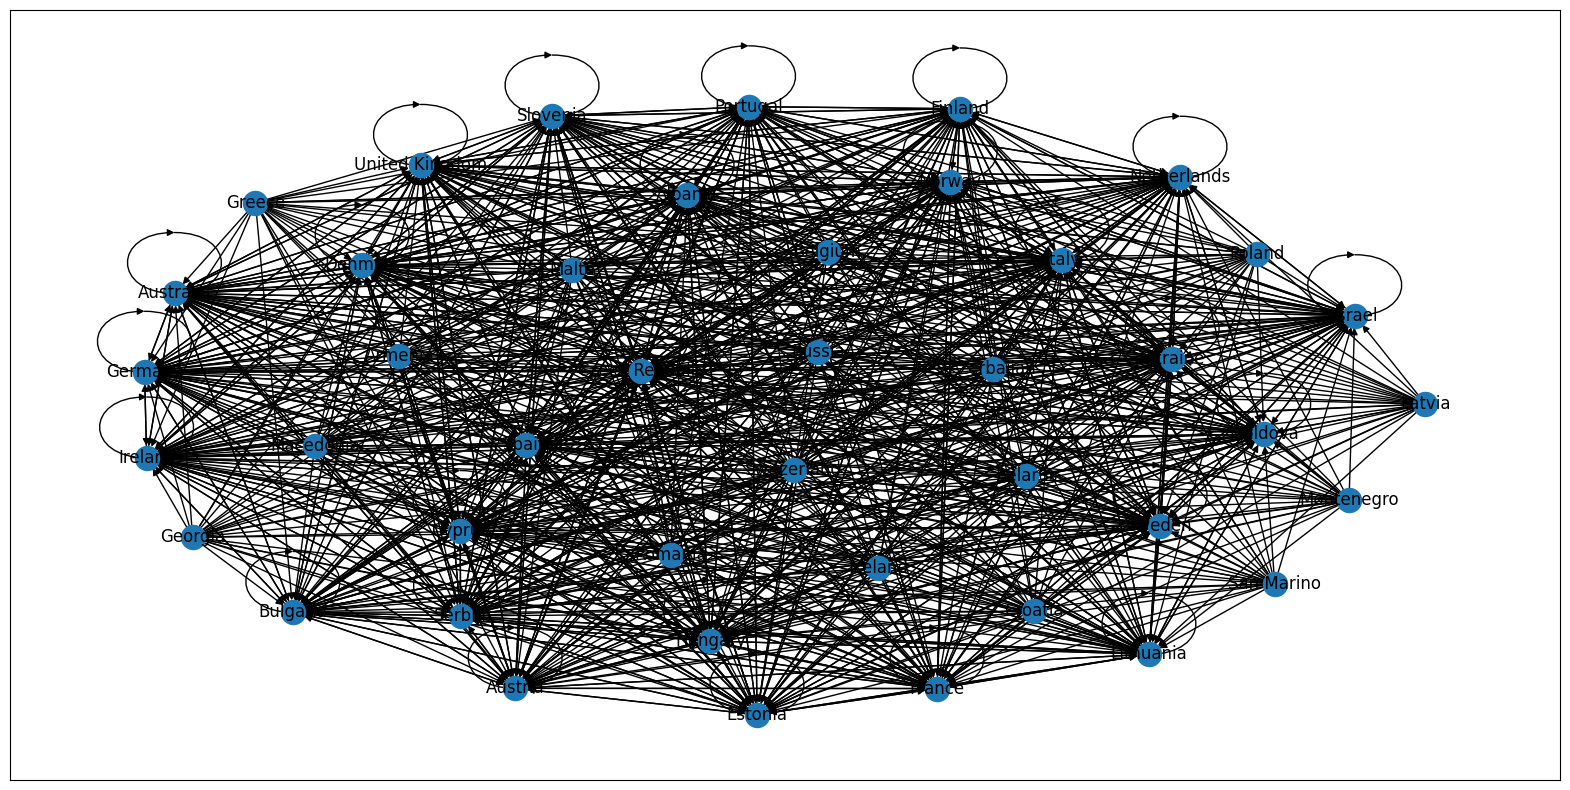

In [ ]:
nx.draw_networkx(G)

Every country is giving the same amount of points (out degree):

In [ ]:
G.out_degree(weight='points')

OutDegreeView({'Albania': 116, 'Israel': 116, 'Cyprus': 116, 'Austria': 116, 'Germany': 116, 'Italy': 116, 'Czech Republic': 116, 'Sweden': 116, 'Estonia': 116, 'Denmark': 116, 'Moldova': 116, 'Lithuania': 116, 'France': 116, 'Bulgaria': 116, 'Norway': 116, 'Ireland': 116, 'Ukraine': 116, 'Netherlands': 116, 'Serbia': 116, 'Australia': 116, 'Hungary': 116, 'Slovenia': 116, 'Spain': 116, 'United Kingdom': 116, 'Finland': 116, 'Portugal': 116, 'Belarus': 116, 'Belgium': 116, 'Croatia': 116, 'Macedonia': 116, 'Greece': 116, 'Iceland': 116, 'Latvia': 116, 'Malta': 116, 'Poland': 116, 'Romania': 116, 'Russia': 116, 'Switzerland': 116, 'Armenia': 116, 'Georgia': 116, 'Montenegro': 116, 'Azerbaijan': 116, 'San Marino': 116})

In [ ]:
Gsub = G.edge_subgraph([(e[0],e[1]) for e in G.edges(data=True) if e[2]['points']>0])

In [ ]:
print('Number of nodes', len(Gsub.nodes))
print('Number of edges', len(Gsub.edges))
print('Average degree', sum(dict(Gsub.degree).values()) / len(Gsub.nodes))

Number of nodes 43
Number of edges 650
Average degree 30.232558139534884


(array([16.,  1.,  3.,  2.,  3.,  5.,  4.,  1.,  4.,  4.]),
 array([13. , 17.5, 22. , 26.5, 31. , 35.5, 40. , 44.5, 49. , 53.5, 58. ]),
 <BarContainer object of 10 artists>)

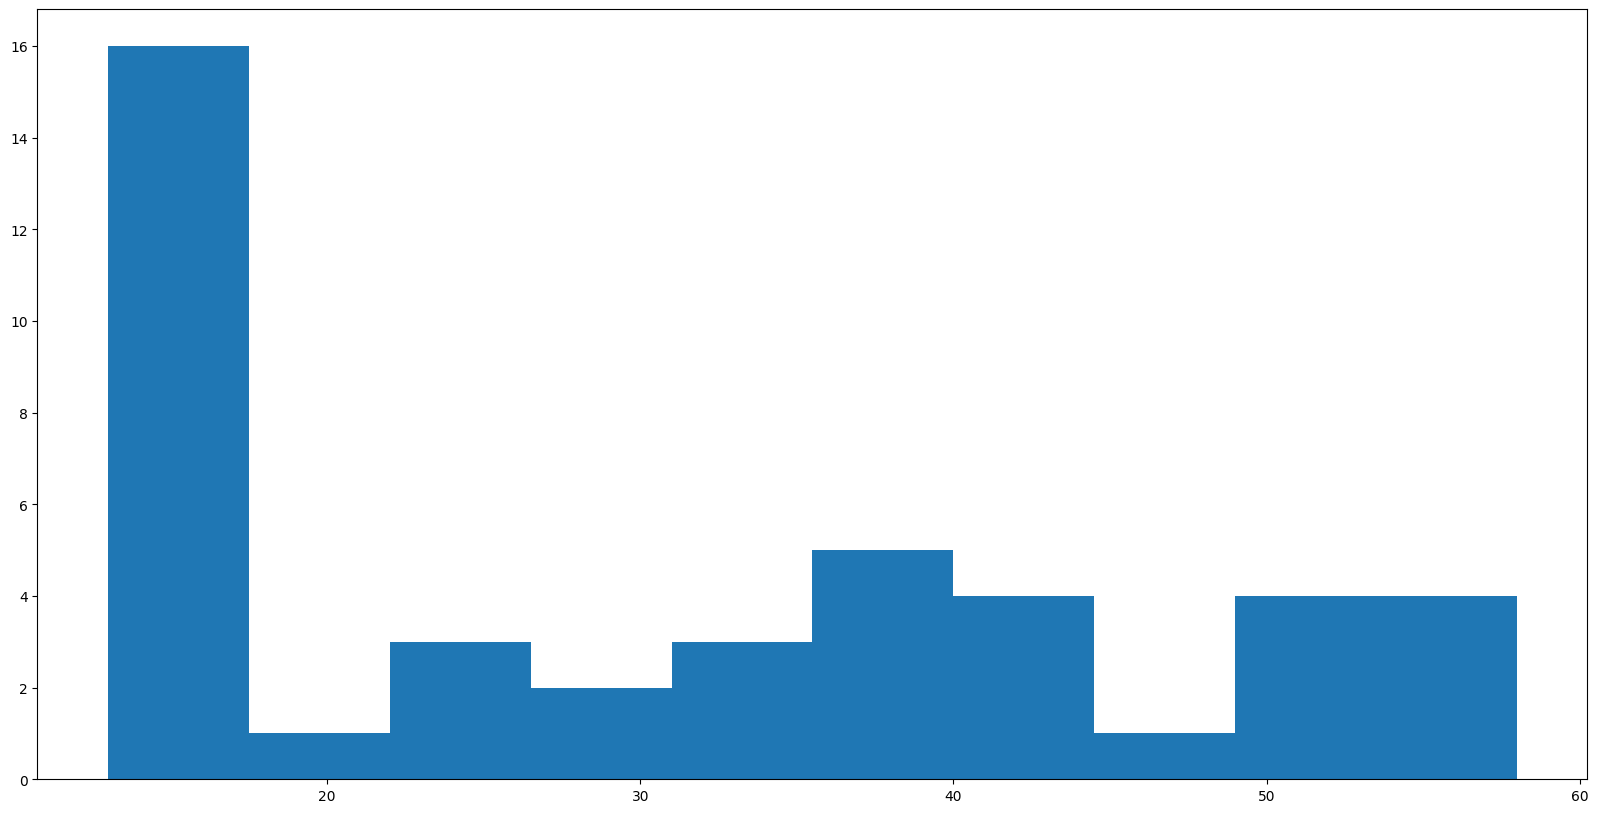

In [ ]:
plt.hist(dict(Gsub.degree()).values())

### However in degree is the one that determines the victory:

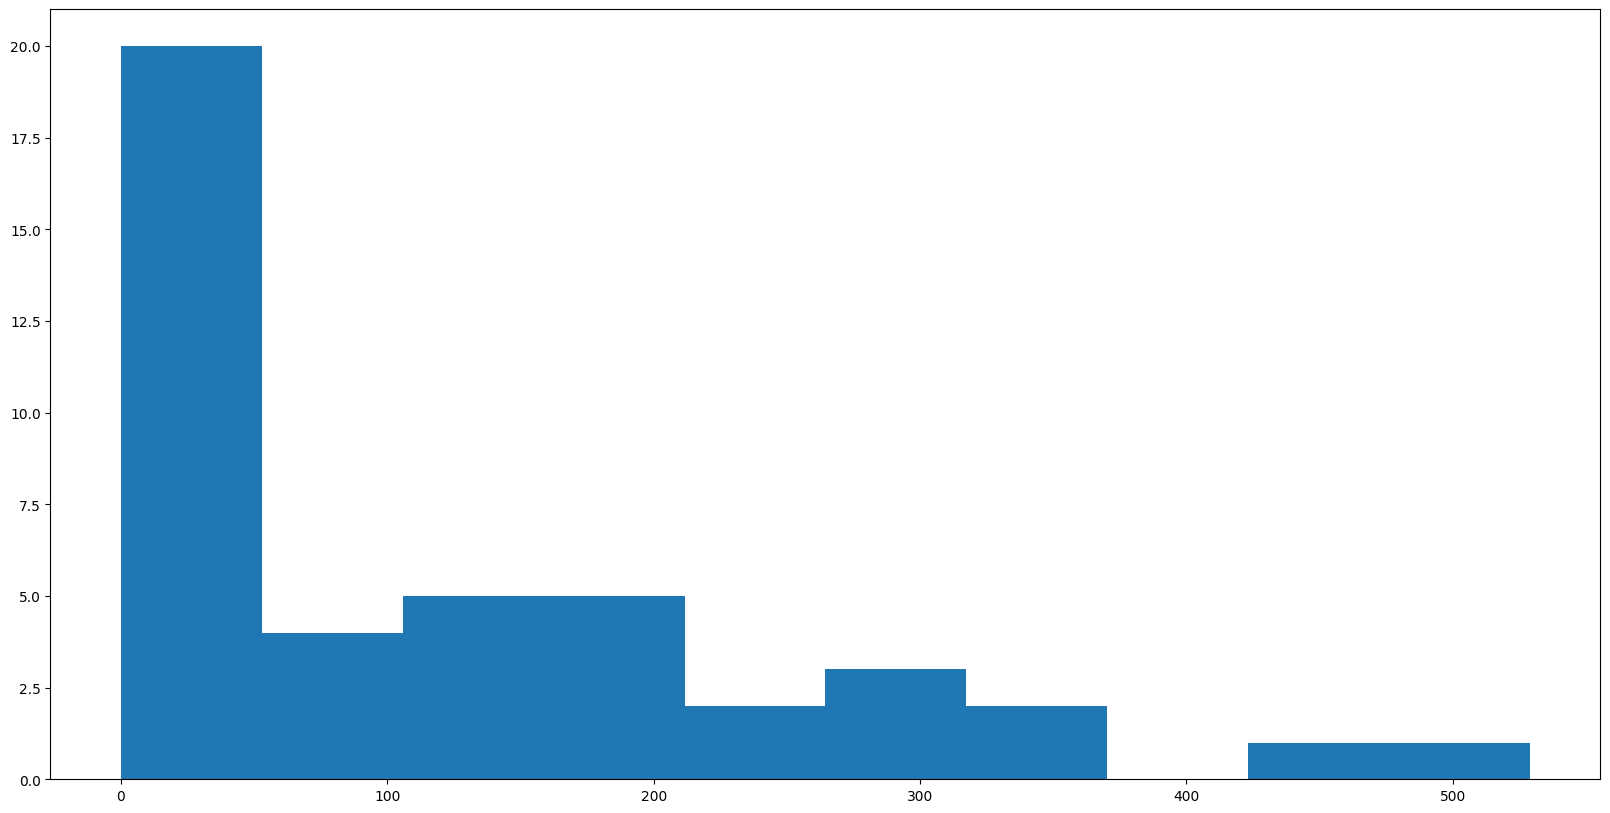

In [ ]:
h = plt.hist(dict(G.in_degree(weight='points')).values())

In [ ]:
deg_cen_points = dict(G.in_degree(weight='points'))
{k:deg_cen_points[k] for k in deg_cen_points if deg_cen_points[k]==max(deg_cen_points.values())}

{'Israel': 529}

In [ ]:
page_rank = dict(nx.pagerank(G, weight='points'))

max_page_rank_nodes = {k: page_rank[k] for k in page_rank if page_rank[k] == max(page_rank.values())}
max_page_rank_nodes

{'Israel': 0.09068767468630143}

In [ ]:
between = dict(nx.betweenness_centrality(G,weight='points'))
{k:between[k] for k in between if between[k]==max(between.values())}

{'Estonia': 46701.144689294066}

Let's assign to each coutry it's flag and position of the map

In [ ]:
countries = pd.read_csv('countries.csv', index_col='Country', encoding='latin1')
print(countries.head())

               cc2   cc3  numeric  latitude  longitude
Country                                               
Afghanistan     AF   AFG        4   33.0000       65.0
Albania         AL   ALB        8   41.0000       20.0
Algeria         DZ   DZA       12   28.0000        3.0
American Samoa  AS   ASM       16  -14.3333     -170.0
Andorra         AD   AND       20   42.5000        1.6


In [ ]:
countries.head()

cc2   cc3  numeric  latitude  longitude
Country                                               
Afghanistan     AF   AFG        4   33.0000       65.0
Albania         AL   ALB        8   41.0000       20.0
Algeria         DZ   DZA       12   28.0000        3.0
American Samoa  AS   ASM       16  -14.3333     -170.0
Andorra         AD   AND       20   42.5000        1.6

In [ ]:
pos_geo = {  node:
           ( max(-10,min(countries.loc[node]['longitude'],55)), # fixing scale
             max(countries.loc[node]['latitude'],25)) #fixing scale
               for node in G.nodes() }

In [ ]:
pos_geo = {}
for node in G.nodes():
    pos_geo[node] = (
                    max(-10,min(countries.loc[node]['longitude'],55)), # fixing scale
                    max(countries.loc[node]['latitude'],25) #fixing scale
    )

In [ ]:
flags = {}
flag_color = {}
for node in tqdm.tqdm_notebook(G.nodes()):
    flags[node] = 'flags/'+(countries.loc[node]['cc3']).lower().replace(' ','')+'.png'
    flag_color[node] =  ColorThief(flags[node]).get_color(quality=1)

  0%|          | 0/43 [00:00<?, ?it/s]

In [ ]:
def RGB(red,green,blue):
    return '#%02x%02x%02x' % (red,green,blue)

Now we will draw all the parts one-by-one

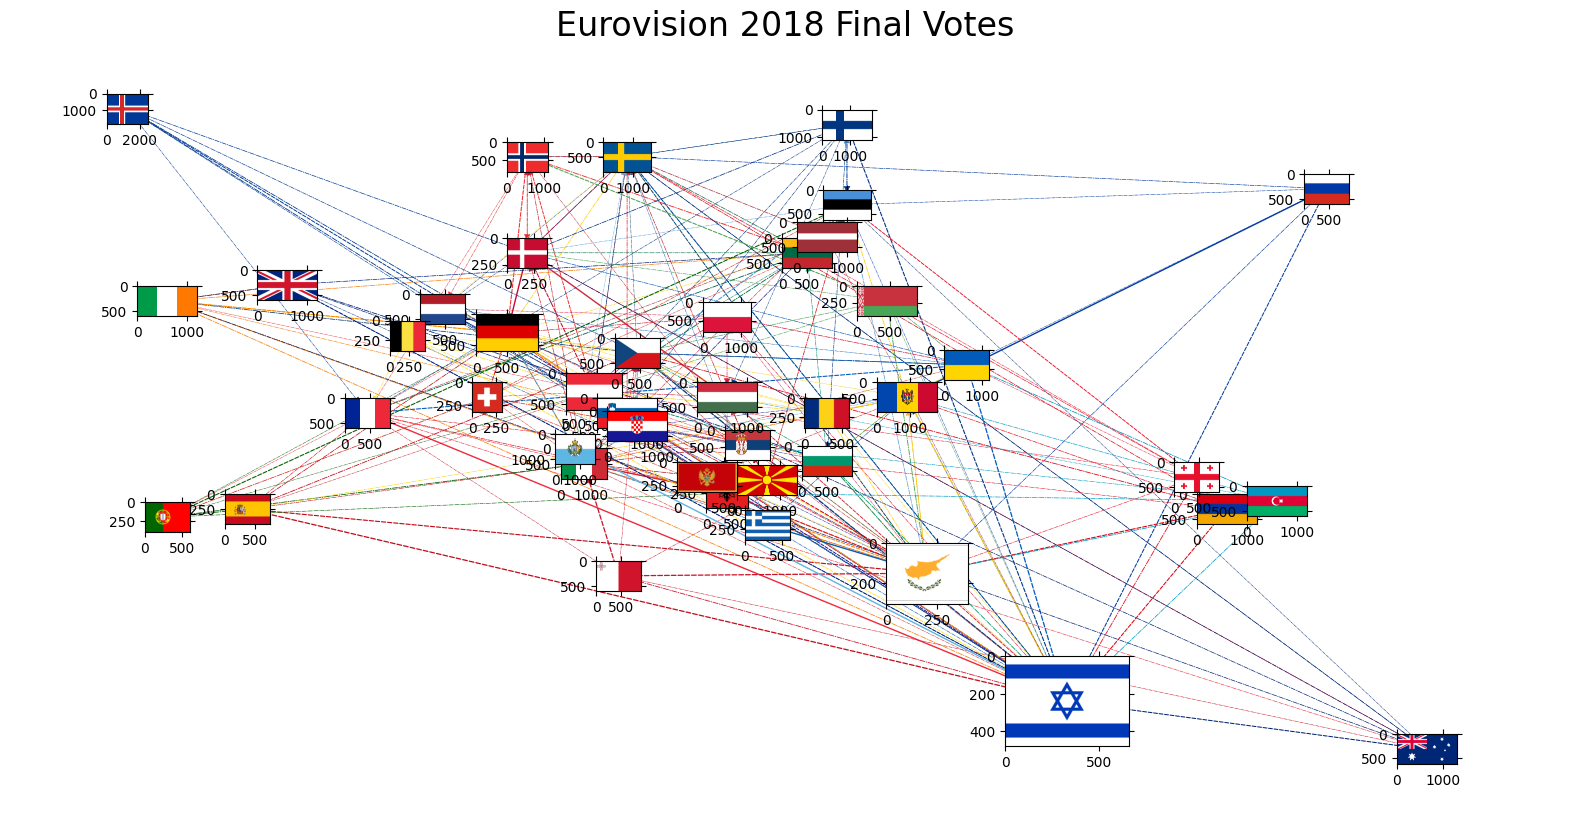

In [ ]:
ax=plt.gca()
fig=plt.gcf()
plt.axis('off')
plt.title('Eurovision 2018 Final Votes',fontsize = 24)

trans = ax.transData.transform
trans2 = fig.transFigure.inverted().transform

tick_params = {'top':'off', 'bottom':'off', 'left':'off', 'right':'off',
              'labelleft':'off', 'labelbottom':'off'} #flag grid params

styles = ['dotted','dashdot','dashed','solid'] # line styles

pos = pos_geo

# draw edges
for e in G.edges(data=True):
    width = e[2]['points']/24 #normalize by max points
    style=styles[int(width*3)]
    if width>0.3: #filter small votes
        nx.draw_networkx_edges(G,pos,edgelist=[e],width=width, style=style, edge_color = RGB(*flag_color[e[0]]) )
        # in networkx versions >2.1 arrowheads can be adjusted

#draw nodes
for node in G.nodes():
    imsize = max((0.3*G.in_degree(node,weight='points')
                  /max(dict(G.in_degree(weight='points')).values()))**2,0.03)

    # size is proportional to the votes
    flag = mpl.image.imread(flags[node])

    (x,y) = pos[node]
    xx,yy = trans((x,y)) # figure coordinates
    xa,ya = trans2((xx,yy)) # axes coordinates

    country = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize ])
    country.imshow(flag)
    country.set_aspect('equal')
    country.tick_params(**tick_params)

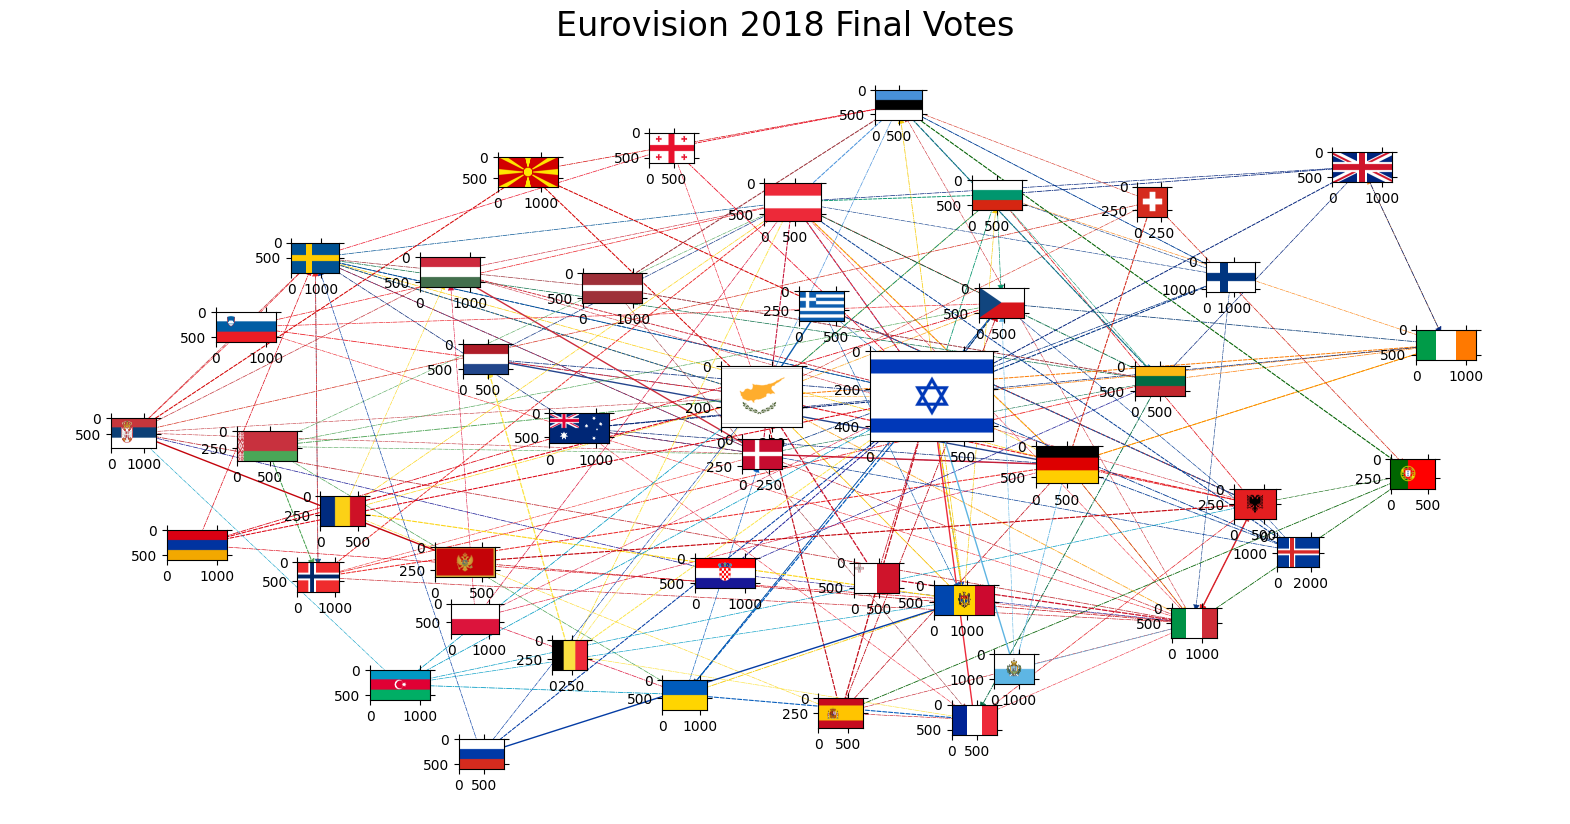

In [ ]:
ax=plt.gca()
fig=plt.gcf()
plt.axis('off')
plt.title('Eurovision 2018 Final Votes',fontsize = 24)

pos = nx.layout.fruchterman_reingold_layout(G,k=1,weight = 'points',iterations=1000,scale = 2)

trans = ax.transData.transform
trans2 = fig.transFigure.inverted().transform


tick_params = {'top':'off', 'bottom':'off', 'left':'off', 'right':'off',
              'labelleft':'off', 'labelbottom':'off'} #flag grid params
styles = ['dotted','dashdot','dashed','solid'] # line styles



# draw edges
for e in G.edges(data=True):
    width = e[2]['points']/24 #normalize by max points
    style=styles[int(width*3)]
    if width>0.4: #filter small votes
        nx.draw_networkx_edges(G,pos,edgelist=[e],width=width,
                               style=style, edge_color = RGB(*flag_color[e[0]]) )
        # in networkx versions >2.1 arrowheads can be adjusted

#draw nodes
for node in G.nodes():
    imsize = max((0.3*G.in_degree(node,weight='points')/max(dict(G.in_degree(weight='points')).values()))**2,0.03)
    # size is proportional to the votes
    flag = mpl.image.imread(flags[node])

    (x,y) = pos[node]
    xx,yy = trans((x,y)) # figure coordinates
    xa,ya = trans2((xx,yy)) # axes coordinates

    country = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize ])
    country.imshow(flag)
    country.set_aspect('equal')
    country.tick_params(**tick_params)


# Communities detection

In [ ]:
!pip install python-louvain

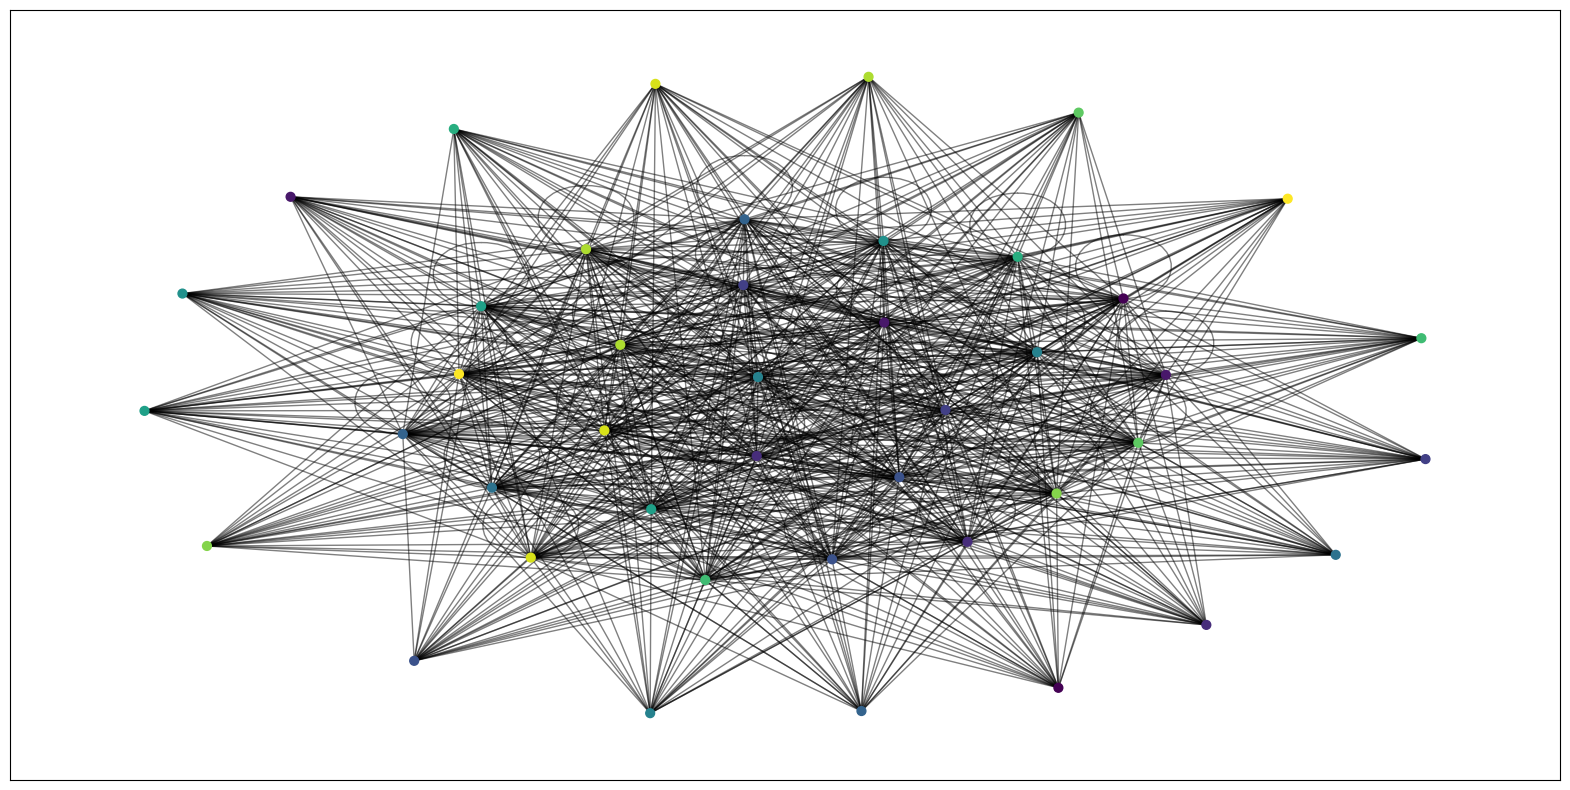

In [ ]:
import networkx as nx
import community.community_louvain as community_louvain
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Convert the directed graph to an undirected graph
G_undirected = G.to_undirected()

# Compute the best partition
partition = community_louvain.best_partition(G_undirected)

# Draw the graph with the community partition
pos = nx.spring_layout(G_undirected)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G_undirected, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G_undirected, pos, alpha=0.5)
plt.show()

In [ ]:
# Convert each centrality measure to a DataFrame
df_degree = pd.DataFrame(list(degree_centrality.items()), columns=['Node', 'Degree Centrality'])
df_closeness = pd.DataFrame(list(closeness_centrality.items()), columns=['Node', 'Closeness Centrality'])
df_betweenness = pd.DataFrame(list(betweenness_centrality.items()), columns=['Node', 'Betweenness Centrality'])
df_eigenvector = pd.DataFrame(list(eigenvector_centrality.items()), columns=['Node', 'Eigenvector Centrality'])
df_pagerank = pd.DataFrame(list(page_rank.items()), columns=['Node', 'PageRank'])

# Merge all DataFrames on the 'Node' column
df_centralities = pd.merge(df_degree, df_closeness, on='Node')
df_centralities = pd.merge(df_centralities, df_betweenness, on='Node')
df_centralities = pd.merge(df_centralities, df_eigenvector, on='Node')
df_centralities = pd.merge(df_centralities, df_pagerank, on='Node')

# Print the DataFrame
df_centralities.head()

Node  Degree Centrality  Closeness Centrality  Betweenness Centrality  \
0  Albania           1.642857                   1.0             1246.915678   
1   Israel           1.642857                   1.0                0.043525   
2   Cyprus           1.642857                   1.0                0.024390   
3  Austria           1.642857                   1.0                0.028543   
4  Germany           1.642857                   1.0                0.035262   

   Eigenvector Centrality  PageRank  
0                0.196116  0.026697  
1                0.196116  0.090688  
2                0.196116  0.064020  
3                0.196116  0.070405  
4                0.196116  0.066846

# Label Propagation Algorithm for Directed Graphs

Since the graph I'm using are basically "Direct", I need to adjust them to a undirected one

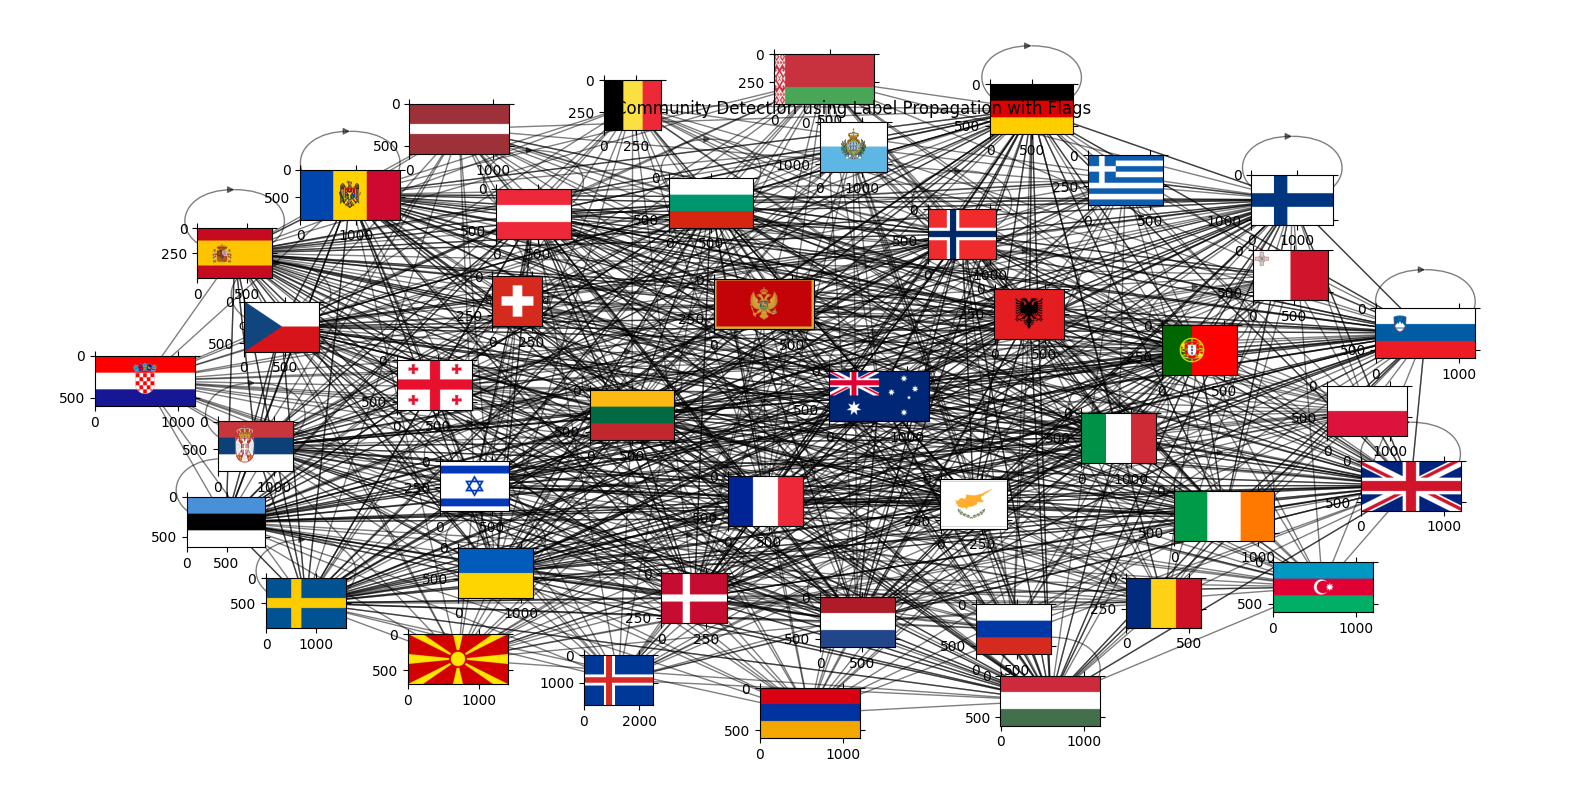

In [ ]:
from networkx.algorithms import community
# Convert to undirected graph for label propagation
G_undirected = G.to_undirected()

# Perform label propagation community detection
communities = community.label_propagation_communities(G_undirected)

# Convert the communities to a dictionary for easy mapping
community_labels = {}
for i, comm in enumerate(communities):
    for node in comm:
        community_labels[node] = i

# Draw the graph with nodes colored by community
pos = nx.spring_layout(G)  # Position nodes using the spring layout
num_communities = len(communities)
cmap = plt.get_cmap('viridis', num_communities)  # Use a colormap with distinct colors

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Draw nodes with color by community
nx.draw_networkx_nodes(G, pos, node_color=[community_labels.get(node, -1) for node in G.nodes()], cmap=cmap, node_size=50)

# Draw labels (optional)
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

# Plot flag images
ax = plt.gca()
fig = plt.gcf()
plt.axis('off')

trans = ax.transData.transform
trans2 = fig.transFigure.inverted().transform

tick_params = {'top': 'off', 'bottom': 'off', 'left': 'off', 'right': 'off',
               'labelleft': 'off', 'labelbottom': 'off'}  # Flag grid params

for node in G.nodes():
    imsize = 0.05  # Adjust size as needed
    flag = mpl.image.imread(flags[node])
    (x, y) = pos[node]
    xx, yy = trans((x, y))  # Figure coordinates
    xa, ya = trans2((xx, yy))  # Axes coordinates
    country = plt.axes([xa - imsize / 2.0, ya - imsize / 2.0, imsize, imsize])
    country.imshow(flag)
    country.set_aspect('equal')
    country.tick_params(**tick_params)

plt.title('Community Detection using Label Propagation with Flags')
plt.show()

# Community Detection (Partitions)

In [ ]:
import community.community_louvain as community_louvain

# Compute the best partition
partition = community_louvain.best_partition(G_undirected)

# Find the most influential nodes based on modularity
most_influential = {node: part for node, part in partition.items() if part == max(partition.values())}
print("Most influential nodes based on modularity:", most_influential)

Most influential nodes based on modularity: {'Hungary': 16, 'Greece': 16}


# Robustness Analysis

In [ ]:
def network_robustness_by_node_removal(G):
    original_size = len(G.nodes())
    robustness = {}

    for node in G.nodes():
        G_temp = G.copy()
        G_temp.remove_node(node)

        # Measure robustness - example with size of largest strongly connected component
        largest_scc_size = len(max(nx.strongly_connected_components(G_temp), key=len))
        robustness[node] = largest_scc_size / original_size

    return robustness

# Example usage
node_removal_robustness = network_robustness_by_node_removal(G)
print("Node Removal Robustness:", node_removal_robustness)

Node Removal Robustness: {'Albania': 0.5813953488372093, 'Israel': 0.5813953488372093, 'Cyprus': 0.5813953488372093, 'Austria': 0.5813953488372093, 'Germany': 0.5813953488372093, 'Italy': 0.5813953488372093, 'Czech Republic': 0.5813953488372093, 'Sweden': 0.5813953488372093, 'Estonia': 0.5813953488372093, 'Denmark': 0.5813953488372093, 'Moldova': 0.5813953488372093, 'Lithuania': 0.5813953488372093, 'France': 0.5813953488372093, 'Bulgaria': 0.5813953488372093, 'Norway': 0.5813953488372093, 'Ireland': 0.5813953488372093, 'Ukraine': 0.5813953488372093, 'Netherlands': 0.5813953488372093, 'Serbia': 0.5813953488372093, 'Australia': 0.5813953488372093, 'Hungary': 0.5813953488372093, 'Slovenia': 0.5813953488372093, 'Spain': 0.5813953488372093, 'United Kingdom': 0.5813953488372093, 'Finland': 0.5813953488372093, 'Portugal': 0.5813953488372093, 'Belarus': 0.6046511627906976, 'Belgium': 0.6046511627906976, 'Croatia': 0.6046511627906976, 'Macedonia': 0.6046511627906976, 'Greece': 0.604651162790697

# Robustness after removing a country (Node removal)

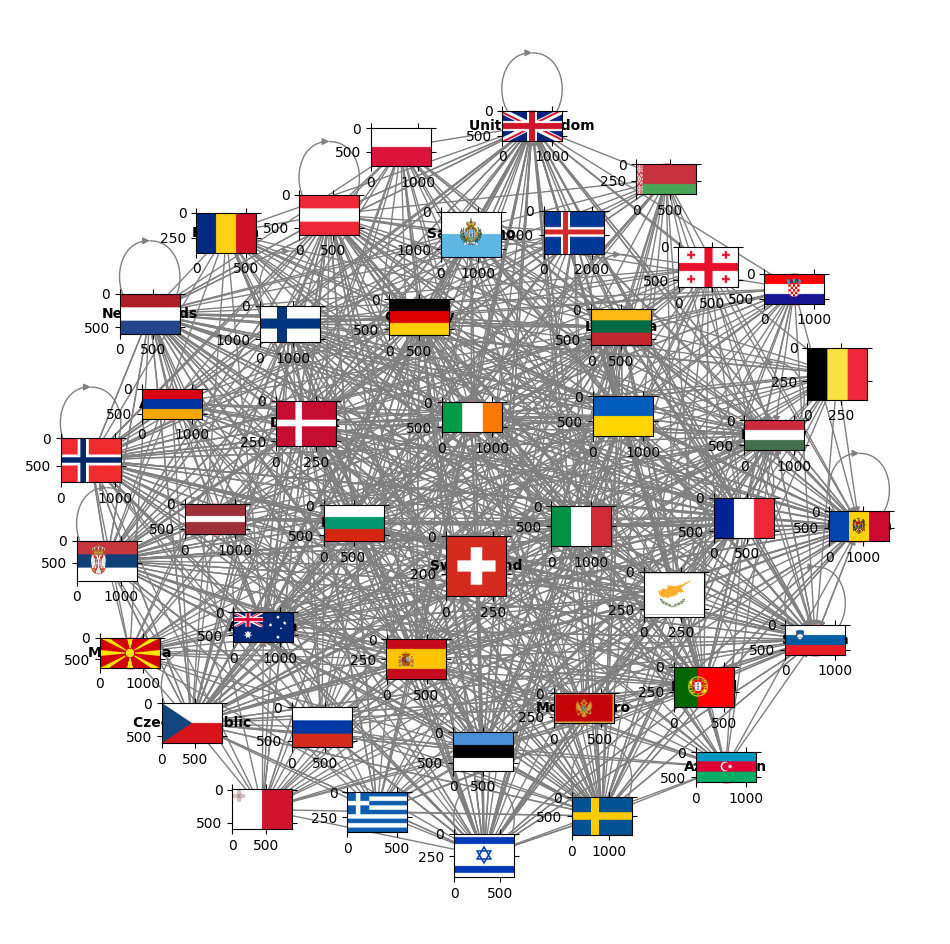

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Choose a node to remove
node_to_remove = 'Albania'  # This will be the country to remove.

# Create a copy of the original graph and remove the chosen node
G_temp = G.copy()
G_temp.remove_node(node_to_remove)

# Plot graph after node removal
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_temp, seed=42)  # Layout for nodes

# Draw the graph with nodes and edges
nx.draw_networkx_nodes(G_temp, pos, node_size=500, node_color='lightcoral')
nx.draw_networkx_edges(G_temp, pos, edge_color='gray')
nx.draw_networkx_labels(G_temp, pos, font_size=10, font_weight='bold')

# Plot flag images
ax = plt.gca()
fig = plt.gcf()
plt.axis('off')

trans = ax.transData.transform
trans2 = fig.transFigure.inverted().transform

tick_params = {'top': 'off', 'bottom': 'off', 'left': 'off', 'right': 'off',
               'labelleft': 'off', 'labelbottom': 'off'}  # Flag grid params

for node in G_temp.nodes():
    imsize = 0.05  # Adjust size as needed
    if node in flags:  # Ensure the node has a flag image
        flag = mpl.image.imread(flags[node])
        (x, y) = pos[node]
        xx, yy = trans((x, y))  # Figure coordinates
        xa, ya = trans2((xx, yy))  # Axes coordinates
        country = plt.axes([xa - imsize / 2.0, ya - imsize / 2.0, imsize, imsize])
        country.imshow(flag)
        country.set_aspect('equal')
        country.tick_params(**tick_params)

plt.show()